In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
import seaborn as sns

## Dropout

avoid overfitting.

using a custom dataset which is highly likely to be overfit. - actual relation is simple - but fit with a complex model.  
here : y = x.

### Data

In [2]:
N = 50
noise = 0.3

X_train = torch.unsqueeze(torch.linspace(-1, 1, N), 1)
Y_train = X_train + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1))
# y = x data. (noise added)

# same to get test data.
X_test = torch.unsqueeze(torch.linspace(-1, 1, N), 1)
Y_test = X_test + noise * torch.normal(torch.zeros(N, 1), torch.ones(N, 1))

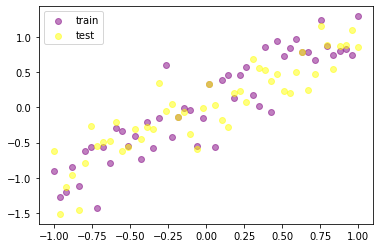

In [3]:
plt.scatter(X_train.detach().numpy(), Y_train.data.numpy(), c='purple', alpha=0.5, label='train')
plt.scatter(X_test.detach().numpy(), Y_test.data.numpy(), c='yellow', alpha=0.5, label='test')
plt.legend()
plt.show()

we can also plot with tensors - but its good practice to convert to numpy and plot. 

### Model

In [4]:
N_h = 100 # Number of hidden layers

# model without dropout
model = torch.nn.Sequential(
    torch.nn.Linear(1, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, 1),
)

# model with dropout 
model_dropout = torch.nn.Sequential(
    torch.nn.Linear(1, N_h),
    torch.nn.Dropout(0.6), 
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, N_h),
    torch.nn.Dropout(0.6),
    torch.nn.ReLU(),
    torch.nn.Linear(N_h, 1),
)

dropout after linear layer   
arg = p  

if we need multiple sequntial, etc. (eg. with a flattening in between) - we make model as a class.   
But if its only one sequantial forward operation - we can make model like above - just a sequantial object.. - and can call directly.

## Train

In [5]:
# loss function
loss_fn = torch.nn.MSELoss() #mse loss - as regression.

# optimizer for model w/o dropout
opt = torch.optim.Adam(model.parameters(), lr=0.01)
# optimizer for model with dropout
opt_dropout = torch.optim.Adam(model_dropout.parameters(), lr=0.01)

### training two models simultaneously

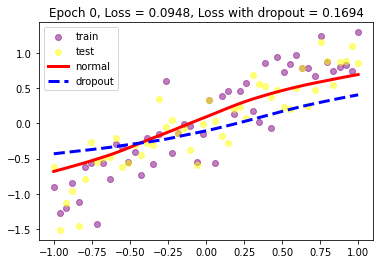

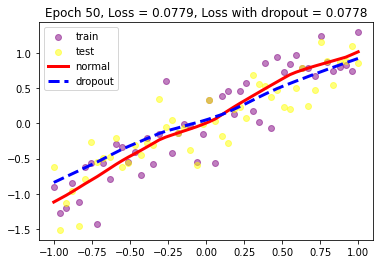

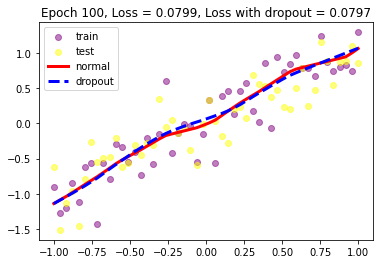

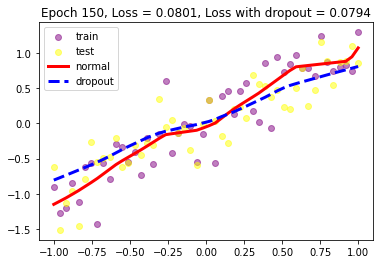

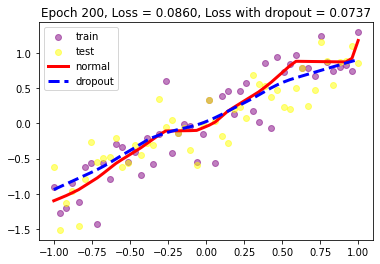

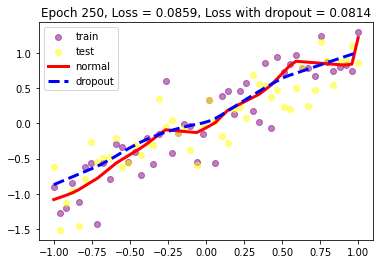

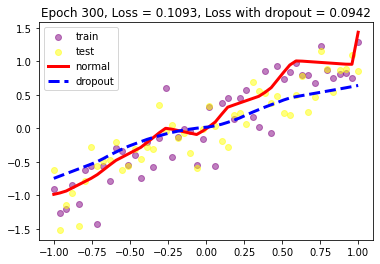

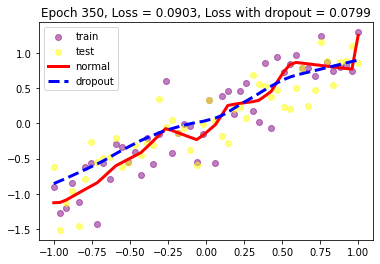

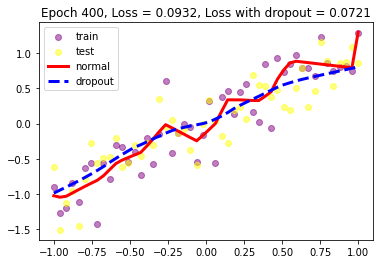

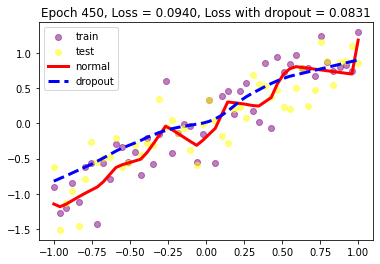

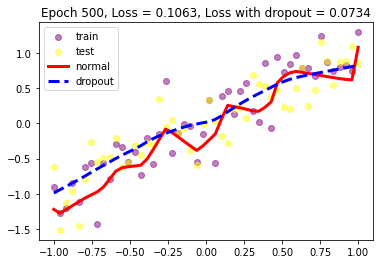

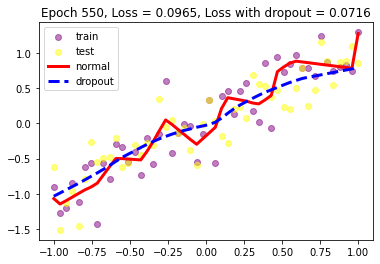

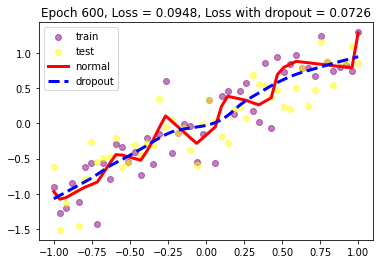

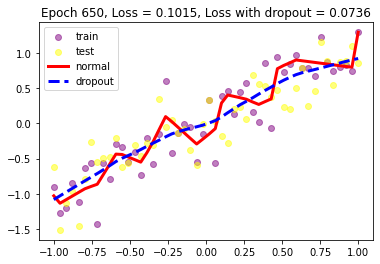

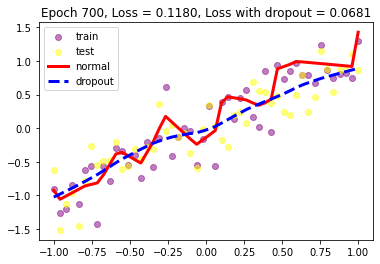

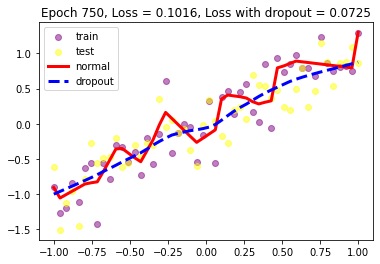

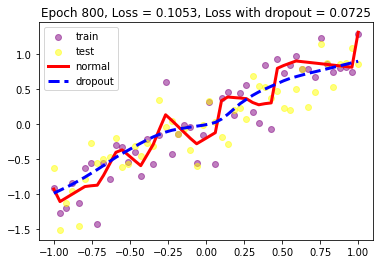

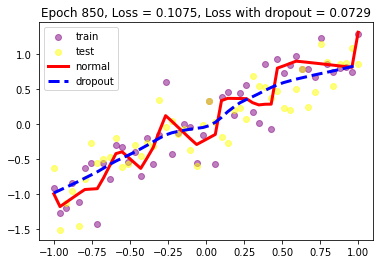

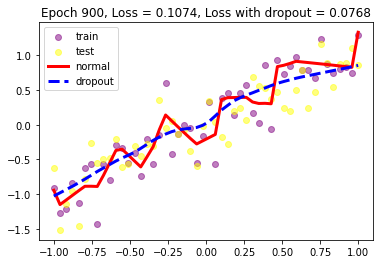

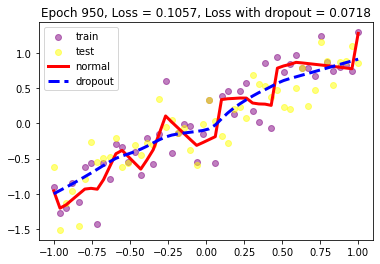

In [6]:
num_epochs = 1000

for epoch in range(num_epochs):
    
    # look at the entire data in a single shot (no batches, only some datapoints)
    
    # 1) model without dropout
    
    # forward pass
    pred = model(X_train)
    
    # loss
    loss = loss_fn(pred, Y_train)
    
    opt.zero_grad() # reset grad
    
    # compute gradient
    loss.backward()
    
    # update parameters
    opt.step()
    
    # 2) model with dropout
    
    # forward pass
    pred_dropout = model_dropout(X_train)
    
    # loss
    loss_dropout = loss_fn(pred_dropout, Y_train)
    
    opt_dropout.zero_grad() # reset gradient
    
    # compute gradient
    loss_dropout.backward()
    
    # update parameters
    opt_dropout.step()
    
    # every 50 epochs
    if epoch % 50 == 0:
        
        model.eval()
        model_dropout.eval()
        
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, Y_test)
        
        test_pred_dropout = model_dropout(X_test)
        test_loss_dropout = loss_fn(test_pred_dropout, Y_test)
        
        # plot actual data (scatter)
        plt.scatter(X_train.detach().numpy(), Y_train.detach().numpy(), c='purple', alpha=0.5, label='train')
        plt.scatter(X_test.detach().numpy(), Y_test.detach().numpy(), c='yellow', alpha=0.5, label='test')
        
        # plot prediction (model without dropout)
        plt.plot(X_test.detach().numpy(), test_pred.detach().numpy(), 'r-', lw=3, label='normal')
        # plot prediction (model with dropout)
        plt.plot(X_test.detach().numpy(), test_pred_dropout.detach().numpy(), 'b--', lw=3,  label='dropout')
        
        plt.title('Epoch %d, Loss = %0.4f, Loss with dropout = %0.4f' % (epoch, test_loss, test_loss_dropout))
        
        plt.legend()

        model.train()
        model_dropout.train() # back to train mode.
        
        plt.pause(0.05)

**eval mode**  (dropout) - rescale weights by 'p'

The model w/o dropout is making too many twists and turns - to hit the train points. - but dropout model not much.

to increase regularization - increase p. (0.6,0.7,..) - drop more neurons.. - more robust.

reducing p - we are getting closer to the original one.. more overfitting.

## train mode, eval mode

in models where we use batchnormalisation, dropout.. where the evaluation forward pass is not same as the training forward pass.

there in evaluation.. do model.eval() - setting the model in eval mode - and then call the model to find the predicted values.

back to train mode ( model.train() ) for next train cycle.